In [71]:
import numpy as np
from matplotlib import pyplot
from functools import partial
from open_atmos_jupyter_utils import show_plot

from PySDM import Formulae
from PySDM.physics import si

In [126]:
formulae = Formulae(
    isotope_equilibrium_fractionation_factors="MerlivatAndNief1967+Majoube1970+Majoube1971",
    isotope_kinetic_fractionation_factors="JouzelAndMerlivat1984",
    isotope_diffusivity_ratios="Stewart1975"
)

saturation = np.linspace(.7, 1.1, 7)
temperature_C = np.linspace(-30, 0)
temperature = formulae.trivia.C2K(temperature_C) * si.K


In [127]:
alpha_liquid = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature)
alpha_kinetic = partial(formulae.isotope_kinetic_fractionation_factors.alpha_kinetic, alpha_equilibrium=alpha, D_ratio_heavy_to_light=formulae.isotope_diffusivity_ratios.ratio_2H_heavy_to_light(temperature))
alpha_ice = formulae.isotope_equilibrium_fractionation_factors.alpha_i_2H(temperature)

0.9965711674381411


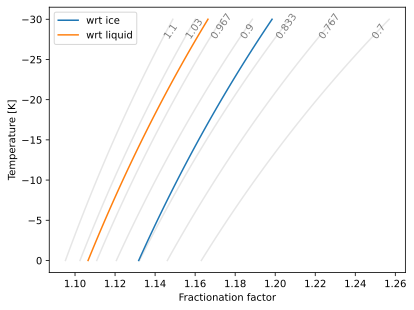

In [149]:
for S in saturation:
    alpha = alpha_liquid * alpha_kinetic(saturation=S)
    pyplot.plot(alpha, temperature_C, 'k', alpha=0.1)
    pyplot.annotate(f'{S:.3g}', xy=(alpha[4], temperature_C[4]), rotation=55, color='k', alpha=0.5, size=10)

pyplot.plot(alpha_kinetic(saturation=1)*alpha_ice, temperature_C, label='wrt ice')
print(alpha[3]/alpha[0])
pyplot.plot(alpha_kinetic(saturation=1)*alpha_liquid, temperature_C, label='wrt liquid')
pyplot.gca().set(
    xlabel='Fractionation factor',
    ylabel="Temperature [K]",
)
pyplot.gca().invert_yaxis()
pyplot.legend()
show_plot()
